In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DataSets/billionaires.csv')
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [3]:
finalworth = df['finalWorth']

In [4]:
mean_finalworth = finalworth.mean()
median_finaworth = finalworth.median()
skweness_finalworth = finalworth.skew()
kurtosis_finalworth = finalworth.kurt()

print(f"Mean: {mean_finalworth}")
print(f"Median: {median_finaworth}")
print(f"Skewness: {skweness_finalworth}")
print(f"Kurtosis: {kurtosis_finalworth}")


Mean: 4623.787878787879
Median: 2300.0
Skewness: 10.012367321086751
Kurtosis: 145.07368067526582


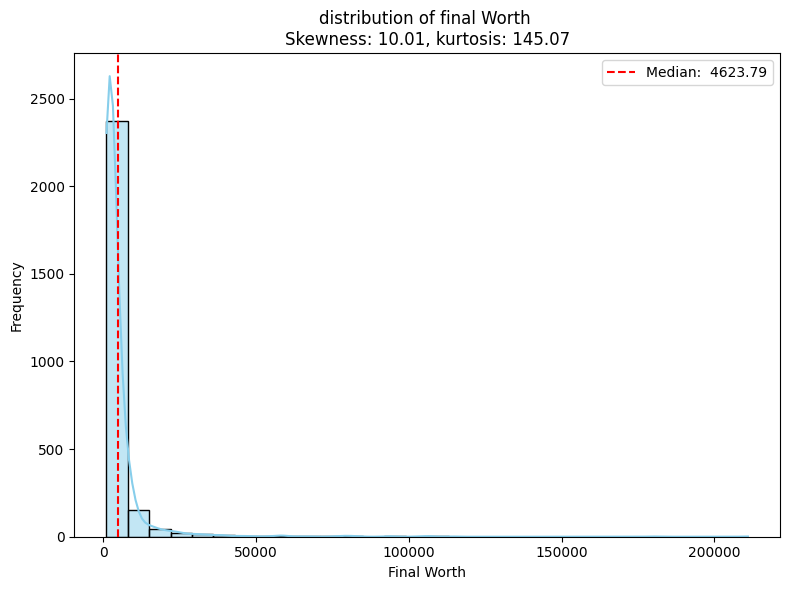

In [8]:
plt.figure(figsize=(8,6))
sns.histplot(finalworth, kde = True, color = 'skyblue', bins =30)
plt.axvline(mean_finalworth, color= 'red', linestyle = '--', label = f'Median:  {mean_finalworth:.2f}')
plt.title(f'distribution of final Worth \nSkewness: {skweness_finalworth:.2f}, kurtosis: {kurtosis_finalworth:.2f}')
plt.xlabel('Final Worth')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

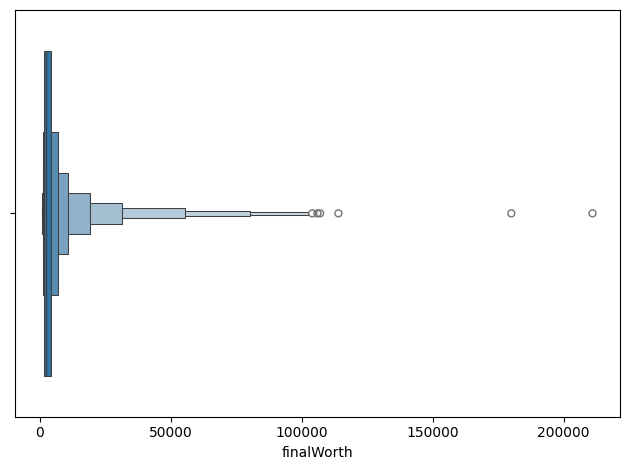

In [10]:
plt.Figure(figsize=(8,6))
sns.boxenplot(finalworth,orient= 'h')
plt.tight_layout()
plt.show()

In [11]:
#removing outlier

Q1 = df['finalWorth'].quantile(0.25)
Q3 = df['finalWorth'].quantile(0.75)
IQR =Q3 - Q1

lower_bond = Q1 - (IQR * 3)
upper_bond = Q3 + (IQR * 3)

df['is_extreme_outlier'] = (df['finalWorth'] < lower_bond) | (df['finalWorth'] > upper_bond)
num_extrem_outliers = df['is_extreme_outlier'].sum()
print(f'Number of extreme outliers: {num_extrem_outliers}')

Number of extreme outliers: 140


In [12]:
#remove extrem outlier and calsulate again
df = df[df['is_extreme_outlier']==False].copy()
finalworth = df['finalWorth']
mean_finalworth = finalworth.mean()
median_finaworth = finalworth.median()
skweness_finalworth = finalworth.skew()
kurtosis_finalworth = finalworth.kurt()

print(f"Mean: {mean_finalworth}")
print(f"Median: {median_finaworth}")
print(f"Skewness: {skweness_finalworth}")
print(f"Kurtosis: {kurtosis_finalworth}")

Mean: 3035.68
Median: 2200.0
Skewness: 1.6646313461296731
Kurtosis: 2.4284061542640627


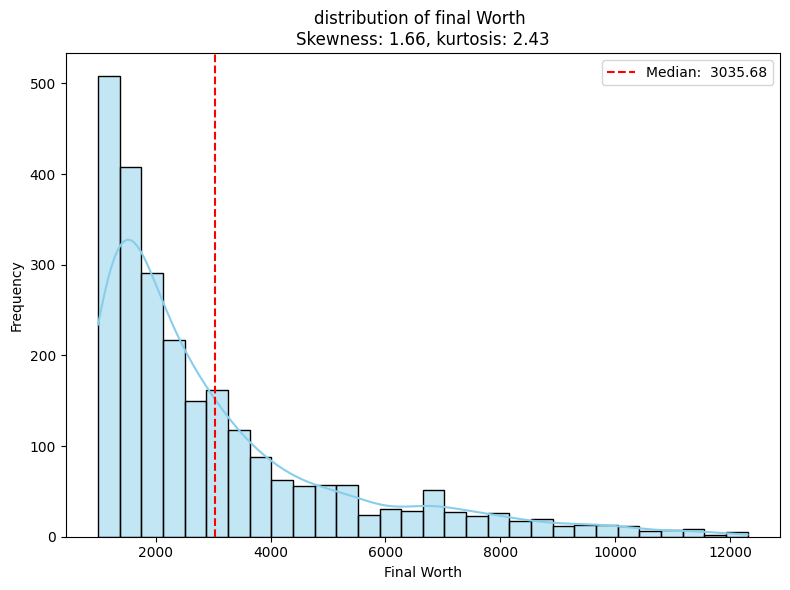

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(finalworth, kde = True, color = 'skyblue', bins =30)
plt.axvline(mean_finalworth, color= 'red', linestyle = '--', label = f'Median:  {mean_finalworth:.2f}')
plt.title(f'distribution of final Worth \nSkewness: {skweness_finalworth:.2f}, kurtosis: {kurtosis_finalworth:.2f}')
plt.xlabel('Final Worth')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

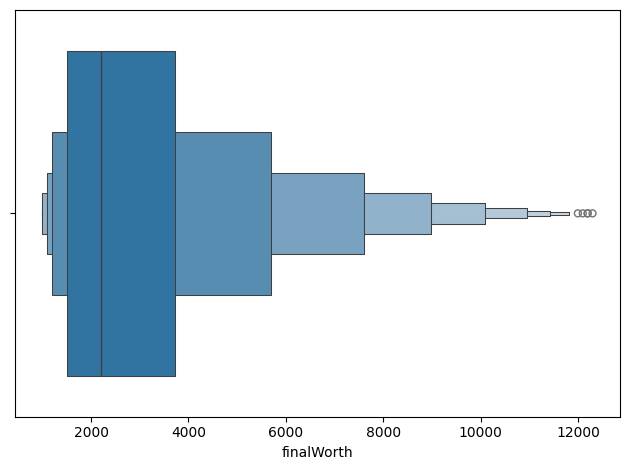

In [14]:
plt.Figure(figsize=(8,6))
sns.boxenplot(finalworth,orient= 'h')
plt.tight_layout()
plt.show()

In [16]:
#Calculation Cov
group1_name = 'Fashion & Retail'
group2_name = 'Technology'

group1 = df[df['category'] == group1_name]['finalWorth']
group2 = df[df['category'] == group2_name]['finalWorth']

cov_group1 = group1.std()/group1.mean() * 100
cov_group2 = group2.std()/group2.mean() * 100

print(f'Coefficient of Variation for {group1_name}: {cov_group1:.2f}%')
print(f'Coefficient of Variation for {group2_name}: {cov_group2:.2f}%')


Coefficient of Variation for Fashion & Retail: 73.09%
Coefficient of Variation for Technology: 77.09%
